In [7]:
# math library
import numpy as np

# plotting library
import matplotlib.pyplot as plt

# scientific library
# helps with pulling .dat files
import scipy.io as sio

In [8]:
# pulling .dat file into notebook
mt = sio.loadmat('Midterm.mat')

T2d = mt['T2D']
T0 = mt['T_o'][0][0]
z2d = mt['Z2D']
k = mt['K'][0][0]
zi = z2d[-1][0]

In [9]:
mt

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Feb  7 11:20:39 2019',
 '__version__': '1.0',
 '__globals__': [],
 'A_D': array([[36]], dtype=uint8),
 'A_Y': array([[11]], dtype=uint8),
 'C': array([[650]], dtype=uint16),
 'K': array([[ 0.03]]),
 'Linewid': array([[ 1.01]]),
 'Per_D': array([[ 88642.663]]),
 'Per_Y': array([[ 59266404.7034033]]),
 'T1D_Steady': array([[-41.48333333, -41.18809524, -40.89285714, -40.59761905,
         -40.30238095, -40.00714286, -39.71190476, -39.41666667,
         -39.12142857, -38.82619048, -38.53095238, -38.23571429,
         -37.94047619, -37.6452381 , -37.35      ]]),
 'T2D': array([[-36.59235249, -36.56037907, -36.52884041, ..., -36.67746773,
         -36.64437762, -36.61171485],
        [-38.77294347, -38.74062706, -38.70852679, ..., -38.85792749,
         -38.8250627 , -38.79240659],
        [-40.12459647, -40.09766581, -40.07080538, ..., -40.19490332,
         -40.16780128, -40.14076327],
        ..., 
        [-37.932526

In [3]:
def T(tf,zf):
    return 1000*k*(tf-ti)/(zf-zi)

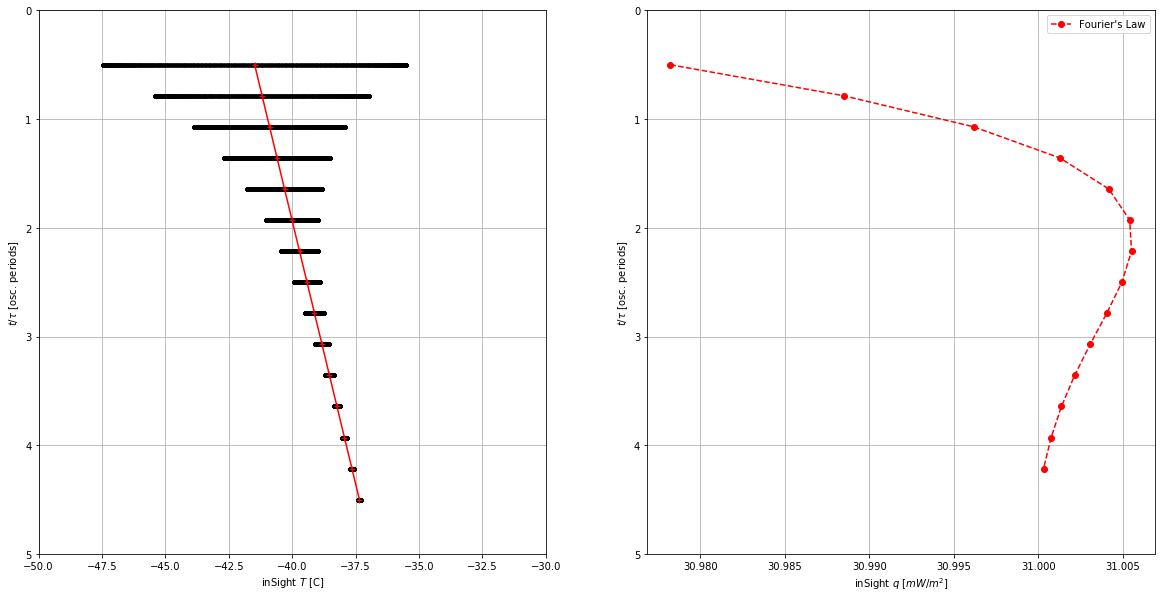

In [10]:
fig,((ax1),(ax2)) = plt.subplots(1,2,figsize=(20,10))
T2dMean = []
z2dLvl = []
for i in range(0,len(T2d)):
    ax1.plot(T2d[i,:],z2d[i,:],'k.',label='Faux Insight Data')
    T2dMean.append(np.mean(T2d[i,:]))
    z2dLvl.append(z2d[i,:1][0])
ax1.plot(T2dMean,z2dLvl,'r+',label='Temporal Means')
ax1.plot(T2dMean,z2dLvl,'r-',label='Temporal Means')

ti = T2dMean[-1]
del T2dMean[-1]
del z2dLvl[-1]
fourier = T(T2dMean,z2dLvl)

ax2.plot(fourier,z2dLvl,'r--o',label='Fourier\'s Law')
ax2.set_ylim(5,0)

ax1.axis([-50,-30,5,0])
ax1.set_ylabel(r'$t/\tau$ [osc. periods]')
ax1.set_xlabel(r'inSight $T$ [C]')
ax1.grid(True)


ax2.set_ylabel(r'$t/\tau$ [osc. periods]')
ax2.set_xlabel(r'inSight $q$ [$mW/m^2$]')
ax2.grid(True)
ax2.legend()
